# Importing Libraries and Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/framingham.csv')

## Data Preprocessing

In [ ]:
df.shape

(4238, 16)

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
glucose,388
education,105
BPMeds,53
totChol,50
cigsPerDay,29
BMI,19
heartRate,1
male,0
age,0
currentSmoker,0


In [ ]:
is_NaN = df.isnull().any(axis=1)
df_null = df[is_NaN]
df_null.shape

(582, 16)

In [ ]:
np.random.seed(1)
df_null.sample(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3191,1,55,1.0,1,30.0,0.0,0,0,0,175.0,150.0,88.0,22.72,56.0,NaN,1
1671,1,51,2.0,1,20.0,0.0,0,1,0,261.0,161.0,105.0,27.47,70.0,NaN,0
1211,1,42,4.0,0,0.0,0.0,0,1,0,245.0,142.5,85.0,35.45,62.0,NaN,0
1448,0,48,2.0,1,20.0,0.0,0,1,0,NaN,153.5,95.0,26.35,100.0,NaN,0
1958,0,43,3.0,0,0.0,0.0,0,0,0,192.0,107.5,67.5,21.22,67.0,NaN,0
3579,1,42,1.0,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
355,0,58,2.0,1,5.0,0.0,0,0,0,177.0,114.0,72.5,24.77,87.0,NaN,0
3007,0,49,2.0,1,20.0,0.0,0,0,0,239.0,123.0,72.0,23.35,62.0,NaN,0
3089,1,54,2.0,0,0.0,0.0,0,1,0,165.0,151.0,100.0,23.74,92.0,NaN,0
4121,0,55,NaN,0,0.0,0.0,0,0,0,240.0,145.0,96.0,26.27,72.0,NaN,0


In [ ]:
df_null_new = df_null.dropna(subset=['glucose'])
df_null_new.sample(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1138,1,59,NaN,1,20.0,0.0,0,0,0,190.0,93.5,69.0,27.25,68.0,74.0,0
3737,0,41,2.0,1,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
3943,1,51,NaN,0,0.0,0.0,0,0,0,219.0,125.0,84.0,20.12,72.0,76.0,0
1610,0,61,1.0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
1622,0,50,NaN,1,15.0,0.0,0,1,0,253.0,132.0,84.5,27.96,88.0,73.0,0
1625,0,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0
1616,0,41,1.0,0,0.0,NaN,0,0,0,179.0,121.0,83.0,23.04,66.0,90.0,0
2542,1,57,NaN,1,NaN,0.0,0,0,0,223.0,107.5,72.5,24.74,62.0,103.0,0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0
3033,0,56,NaN,1,5.0,0.0,0,0,0,285.0,124.0,80.0,24.54,52.0,106.0,0


In [ ]:
meanFiller = lambda x: x.fillna(x.mean())
numeric_col = df_null_new.select_dtypes(include=np.number).columns.tolist()
df[numeric_col] = df[numeric_col].apply(meanFiller, axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


## Univariant Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(16, 6), kde=False, bins=None):
    """
    Combines boxplot and histogram

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (16,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="aqua"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
#format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded off to 2 decimal places

In [ ]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
education,4238.00,1.98,1.01,1.00,1.00,2.00,3.00,4.00
cigsPerDay,4238.00,9.00,11.88,0.00,0.00,0.00,20.00,70.00
BPMeds,4238.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
totChol,4238.00,236.72,44.33,107.00,206.00,234.00,262.00,696.00
sysBP,4238.00,132.35,22.04,83.50,117.00,128.00,144.00,295.00
diaBP,4238.00,82.89,11.91,48.00,75.00,82.00,89.88,142.50
BMI,4238.00,25.80,4.07,15.54,23.08,25.41,28.04,56.80
heartRate,4238.00,75.88,12.03,44.00,68.00,75.00,83.00,143.00
glucose,4238.00,81.97,22.84,40.00,72.00,80.00,85.00,394.00


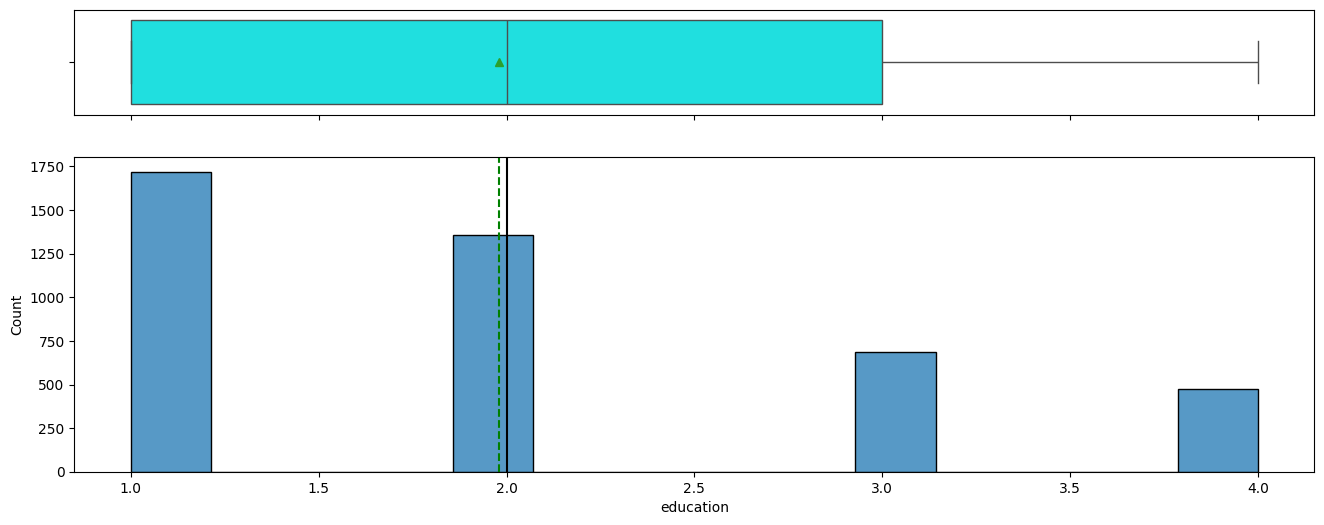

In [ ]:
histogram_boxplot(df, 'education')

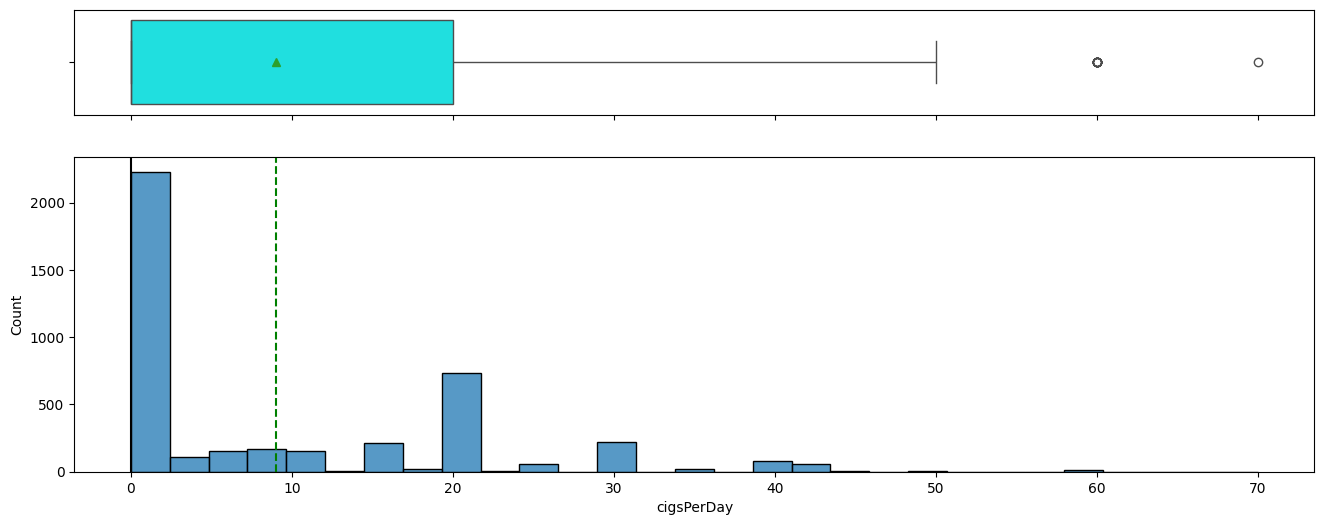

In [ ]:
histogram_boxplot(df, 'cigsPerDay')

In [ ]:
df.cigsPerDay.value_counts().sort_values(ascending=False)

,count
cigsPerDay,
0.00,2144
20.00,734
30.00,217
15.00,210
10.00,143
9.00,130
5.00,121
3.00,100
40.00,80


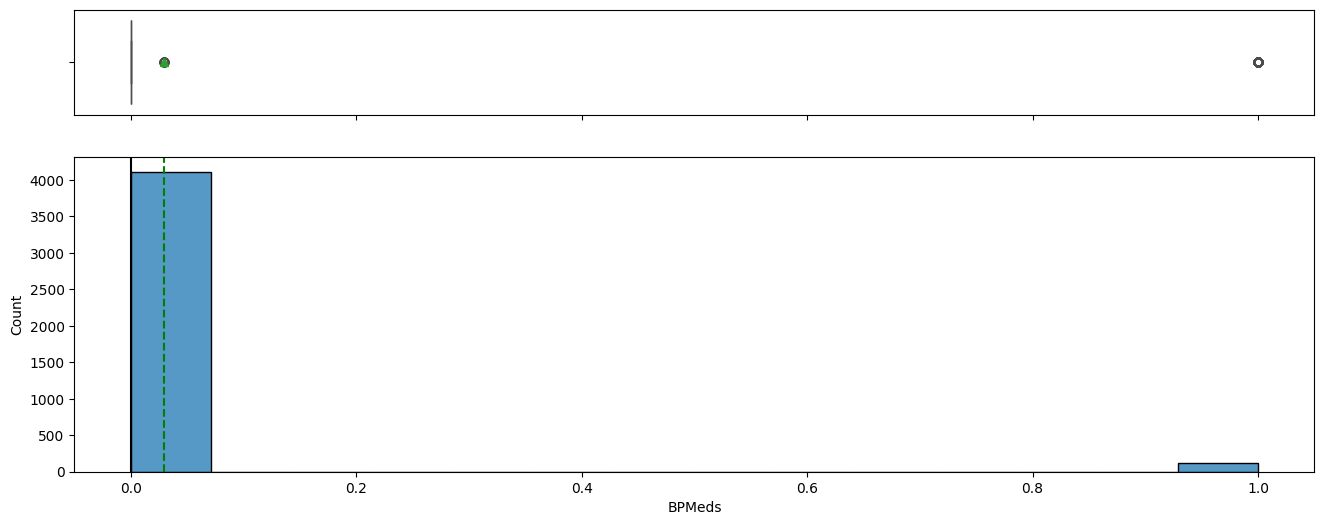

In [ ]:
histogram_boxplot(df, 'BPMeds')

In [ ]:
df.BPMeds.value_counts()

,count
BPMeds,
0.00,4061
1.00,124
0.03,53


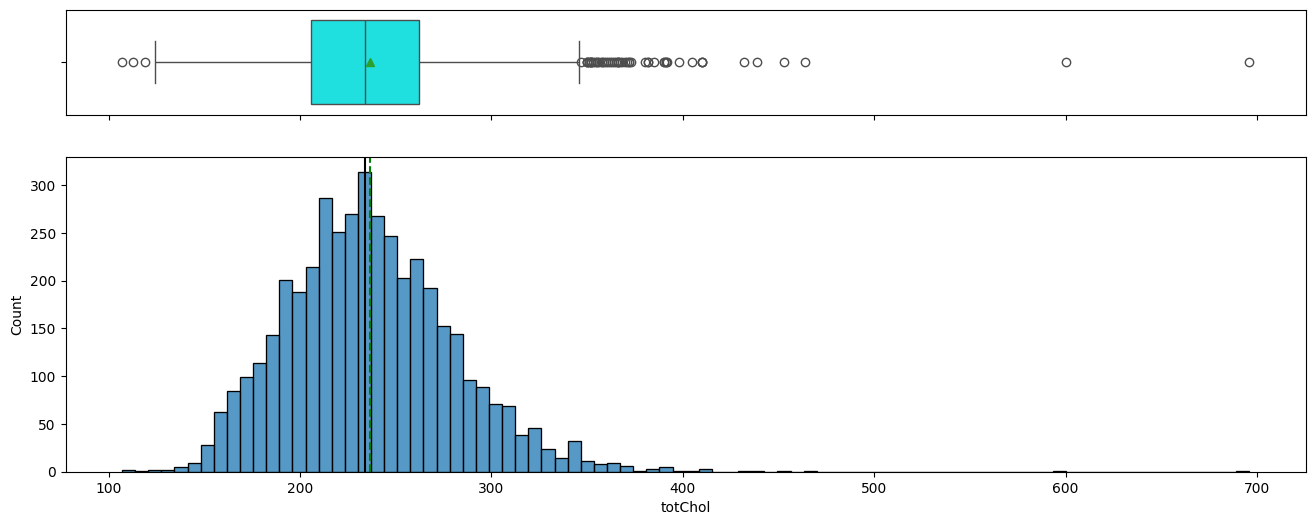

In [ ]:
histogram_boxplot(df, 'totChol')

In [ ]:
df[df['totChol'] > 500.00]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,2.00,0,0.00,0.00,0,1,1,600.00,159.50,94.00,28.27,78.00,140.00,1
3160,1,51,1.98,1,9.00,0.00,0,1,0,696.00,157.00,87.00,24.44,95.00,84.00,0


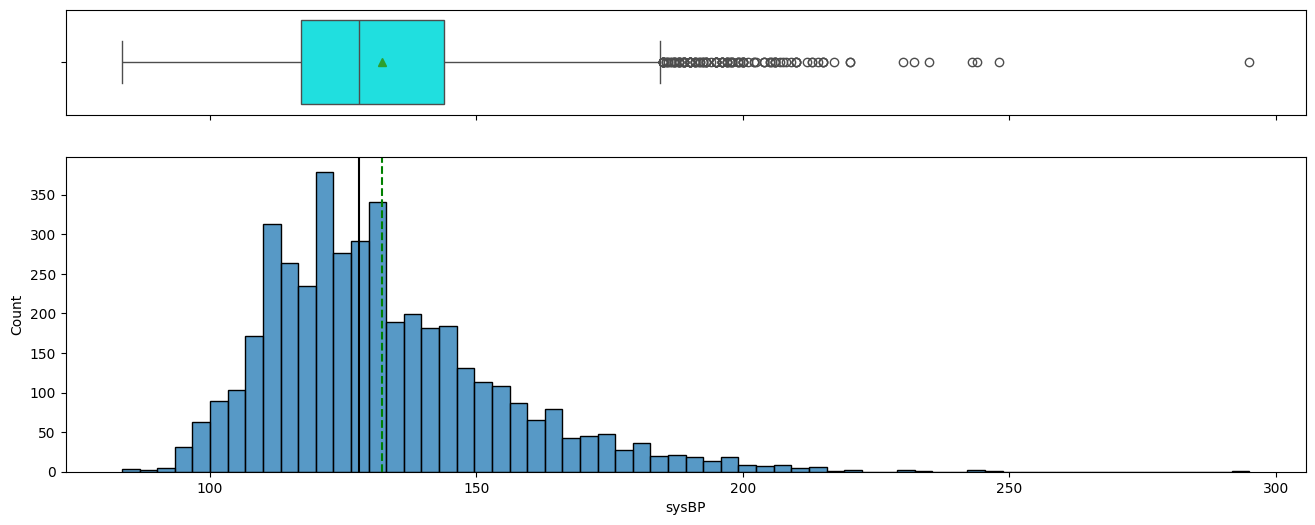

In [ ]:
histogram_boxplot(df, 'sysBP')

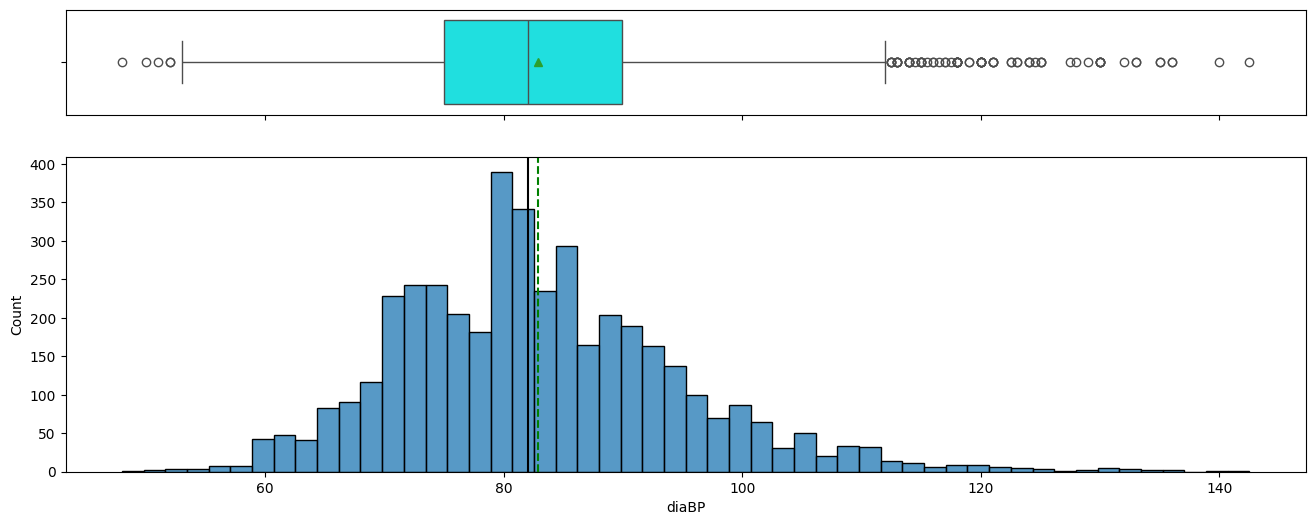

In [ ]:
histogram_boxplot(df, 'diaBP')

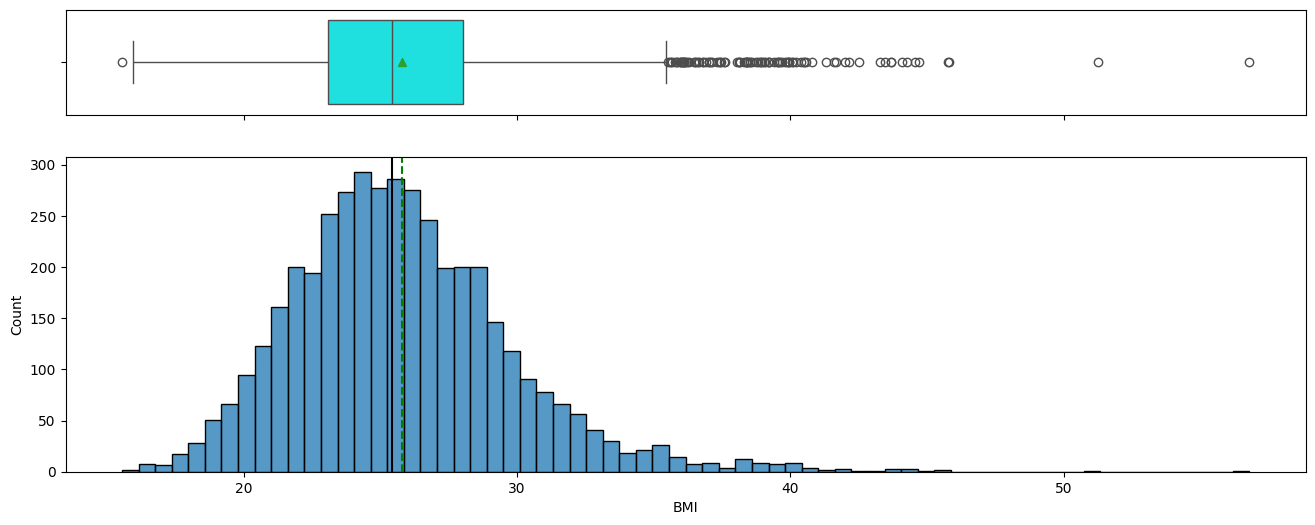

In [ ]:
histogram_boxplot(df, 'BMI')

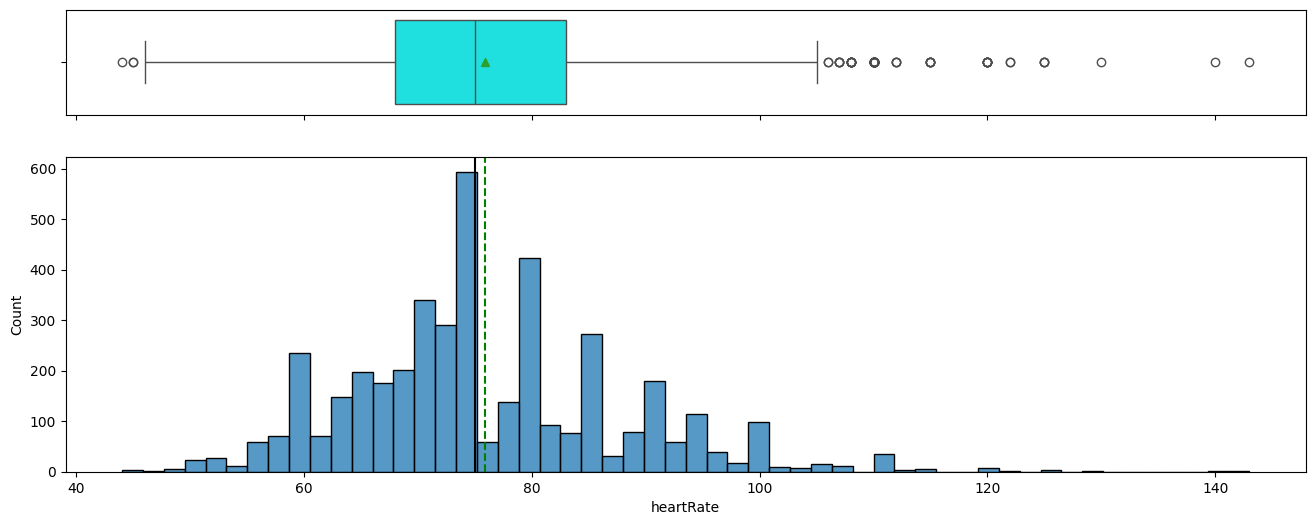

In [ ]:
histogram_boxplot(df, 'heartRate')

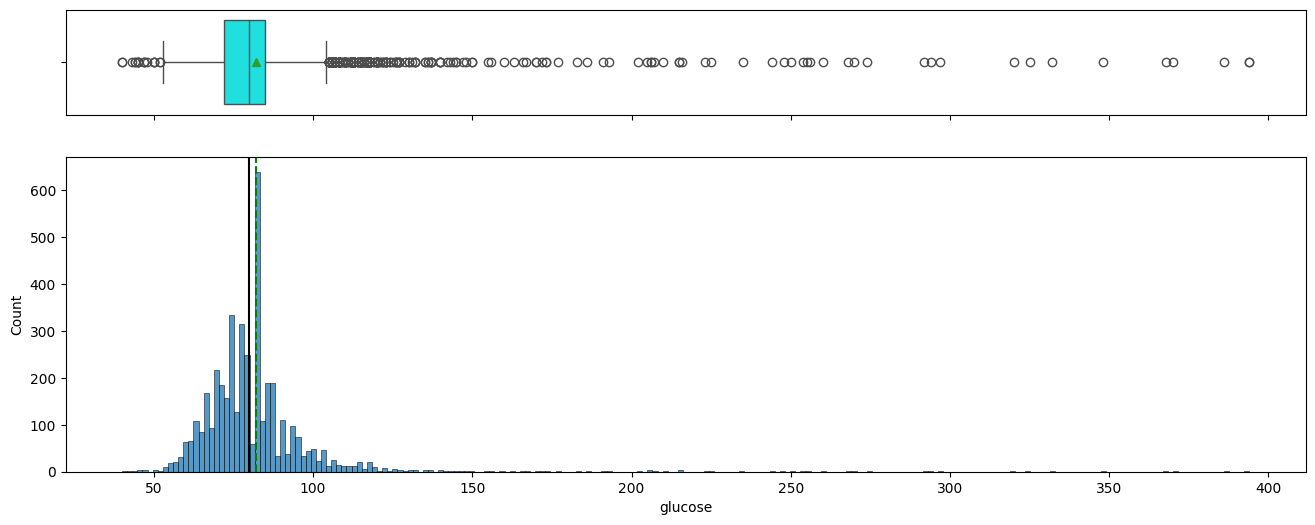

In [ ]:
histogram_boxplot(df, 'glucose')

In [ ]:
df[df['glucose'] > 150.00].shape

(50, 16)

In [ ]:
df.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
male,4238.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
age,4238.00,49.58,8.57,32.00,42.00,49.00,56.00,70.00
currentSmoker,4238.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
prevalentStroke,4238.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00
prevalentHyp,4238.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
diabetes,4238.00,0.03,0.16,0.00,0.00,0.00,0.00,1.00
TenYearCHD,4238.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00


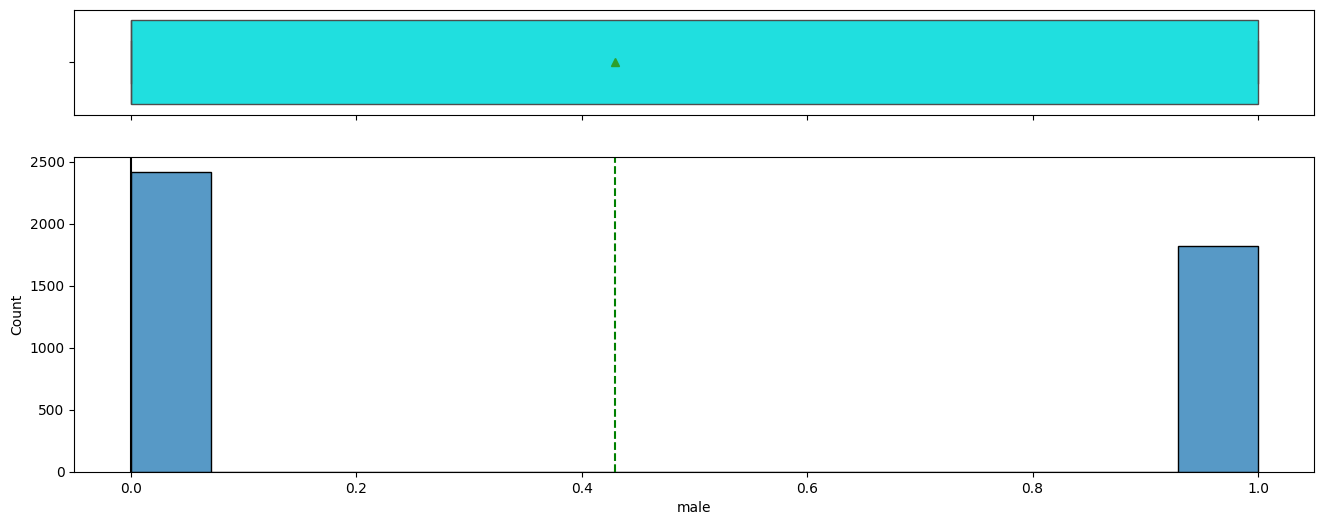

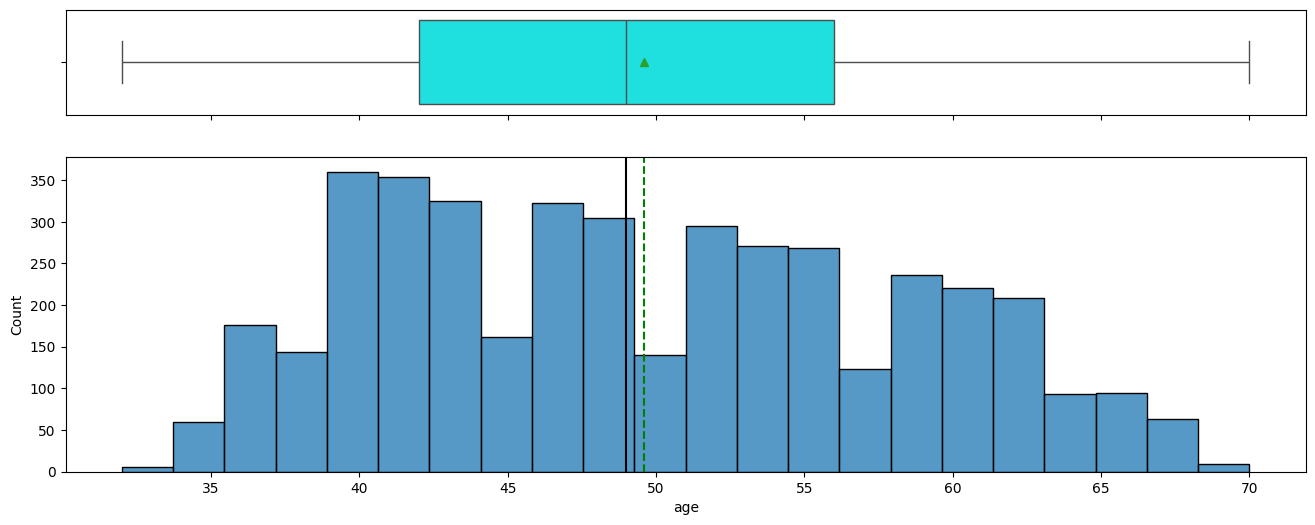

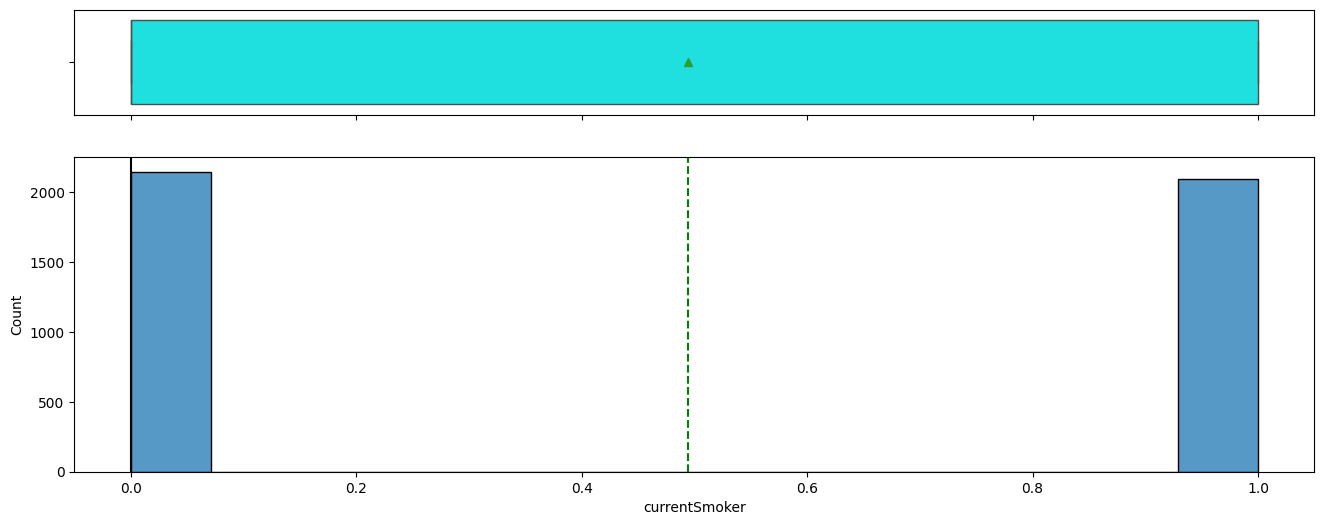

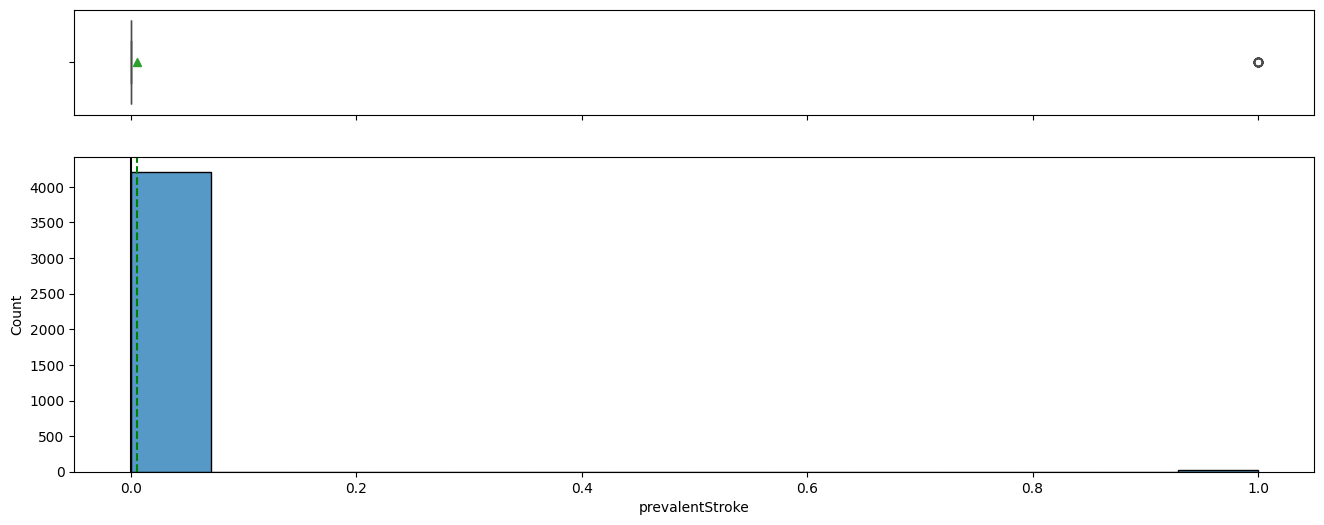

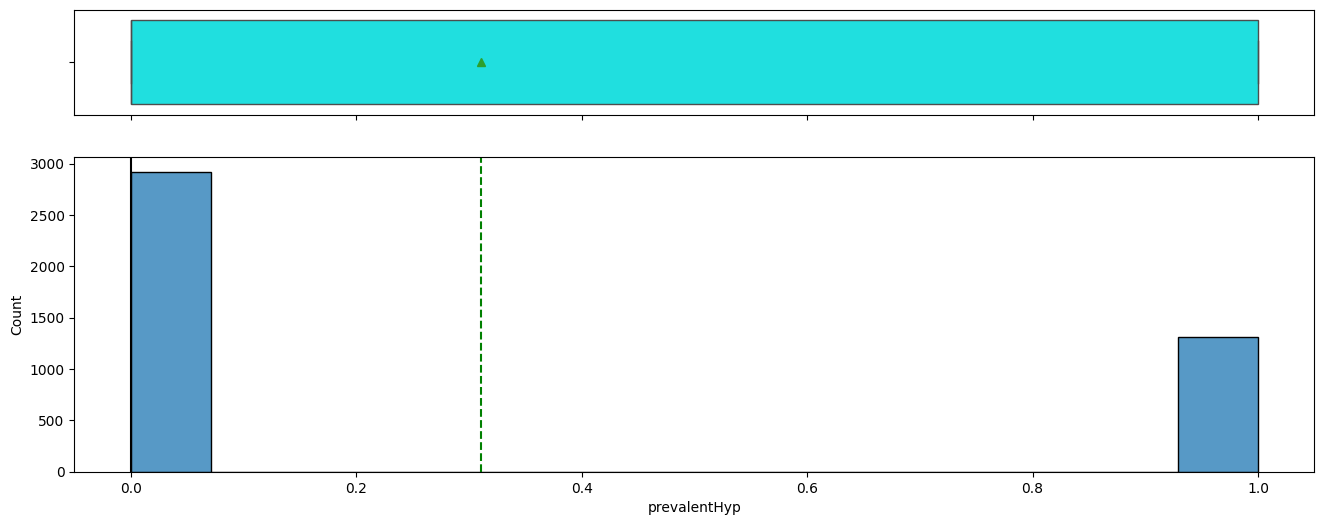

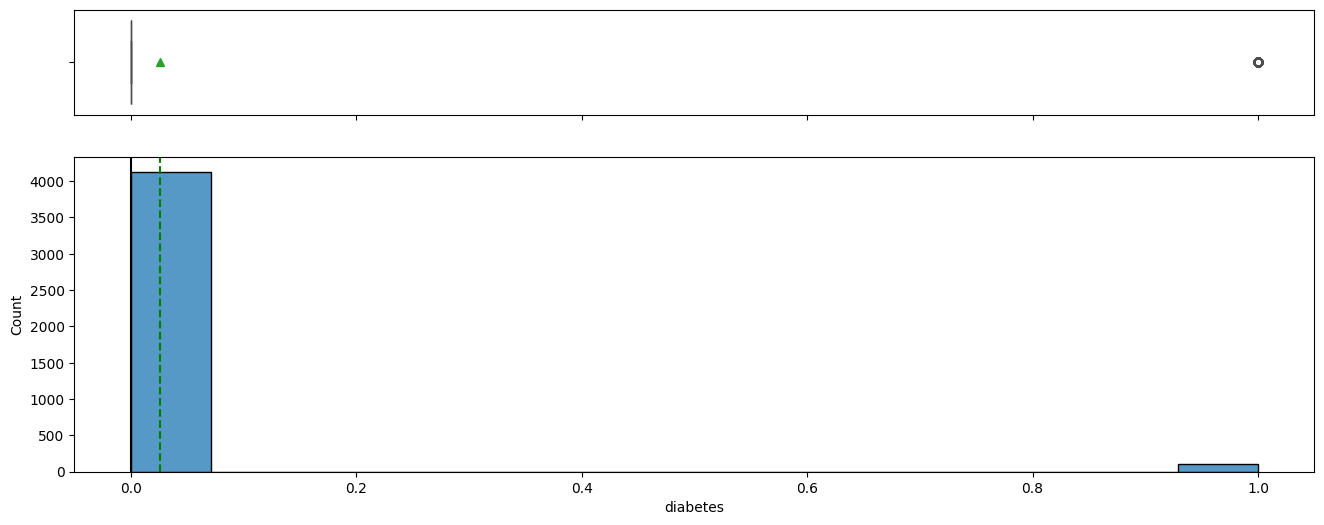

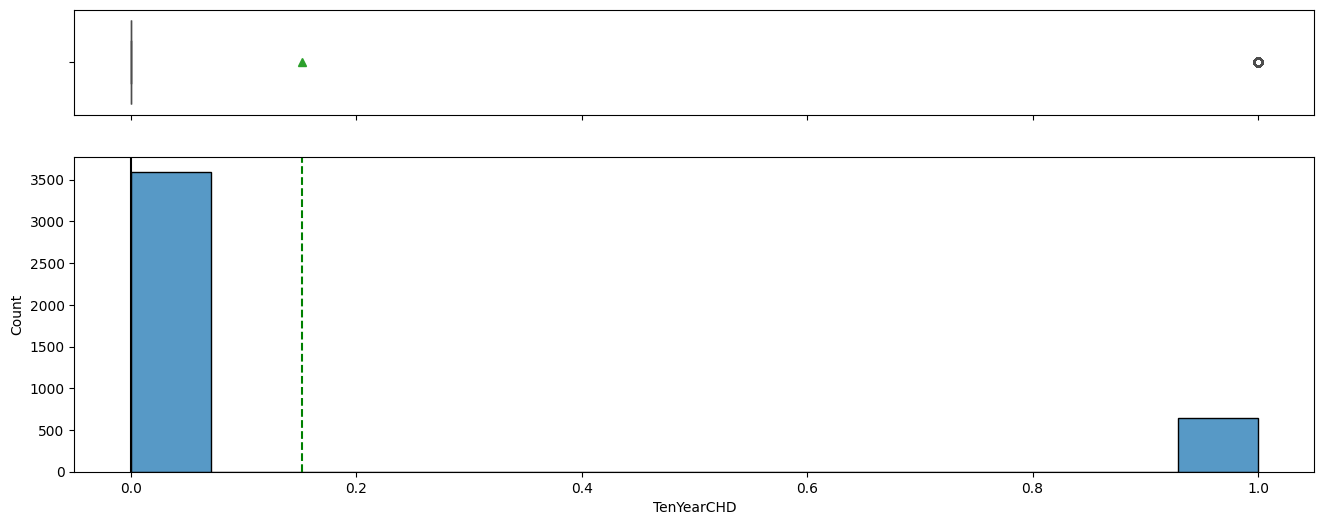

In [ ]:
for col in df.columns[df.dtypes=='int64']:
  histogram_boxplot(df,col)

In [ ]:
df.prevalentStroke.value_counts()

,count
prevalentStroke,
0,4213
1,25


## Bivariant Analysis

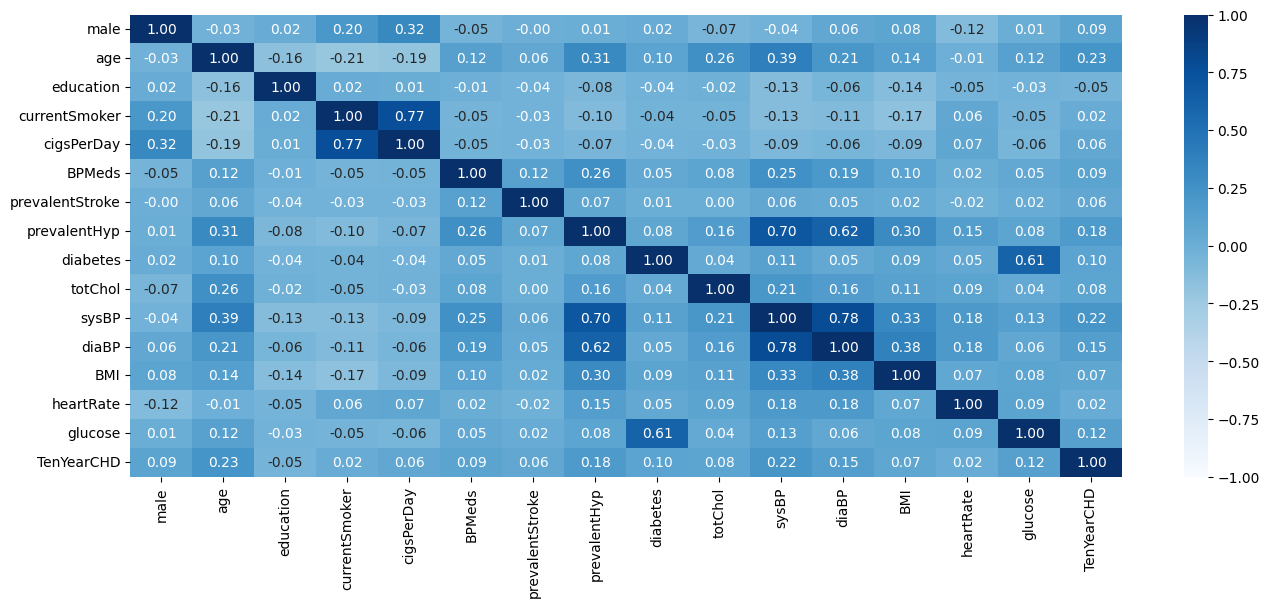

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f", vmax=1, vmin=-1, center=0)
plt.show()

## Handling Outliers

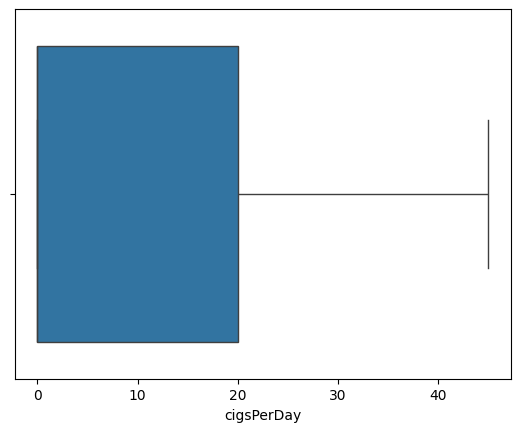

In [ ]:
df_model = df.copy()
df_model = df_model[df.cigsPerDay<50]
sns.boxplot(data= df_model, x='cigsPerDay')
plt.show()

<ipython-input-35-7b659f430744>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_model = df_model[df.totChol<350]
<ipython-input-35-7b659f430744>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_model = df_model[df.totChol>120]


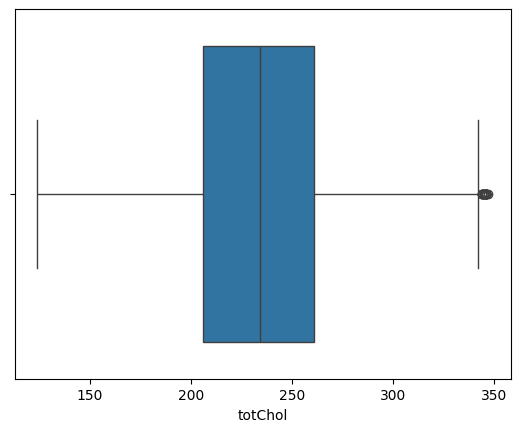

In [ ]:
df_model = df_model[df.totChol<350]
df_model = df_model[df.totChol>120]
sns.boxplot(data= df_model, x='totChol')
plt.show()

<ipython-input-36-5ea66aa18aeb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_model = df_model[df.glucose<150.00]


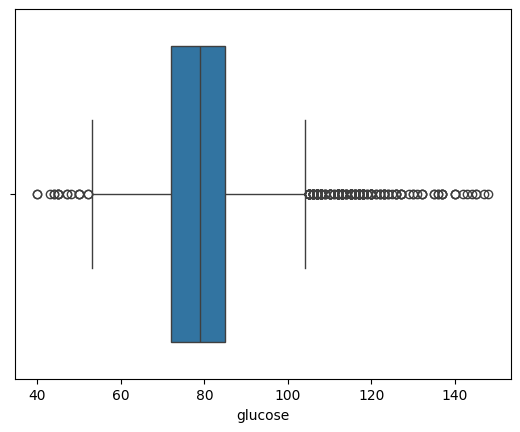

In [ ]:
df_model = df_model[df.glucose<150.00]
sns.boxplot(data= df_model, x='glucose')
plt.show()

In [ ]:

df_model = df_model.drop(['diabetes','BPMeds', 'prevalentStroke'],  axis=1)


In [ ]:
df_model.shape

(4113, 13)

# Logistic Regression

In [ ]:
y=df_model['TenYearCHD']
X=df_model.drop('TenYearCHD',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape

((3290, 12), (823, 12))

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(3290, 12) (823, 12) (3290,) (823,)


In [ ]:
lrmodel = LogisticRegression()

lrmodel.fit(X_train,y_train)
print(lrmodel.score(X_train,y_train),lrmodel.score(X_test,y_test))


0.8617021276595744 0.8493317132442284


## Confusion Matrix

In [ ]:
lr_predict = lrmodel.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)

confussion matrix
[[691   1]
 [123   8]]


In [ ]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       692
           1       0.89      0.06      0.11       131

    accuracy                           0.85       823
   macro avg       0.87      0.53      0.52       823
weighted avg       0.86      0.85      0.79       823



## Multicollinearity Check

In [ ]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
vif_cal(input_data=df_model, dependent_col="TenYearCHD")

male  VIF =  1.19
age  VIF =  1.38
education  VIF =  1.05
currentSmoker  VIF =  2.63
cigsPerDay  VIF =  2.77
prevalentHyp  VIF =  2.02
totChol  VIF =  1.11
sysBP  VIF =  3.7
diaBP  VIF =  2.99
BMI  VIF =  1.23
heartRate  VIF =  1.09
glucose  VIF =  1.04


## P-value verification

In [ ]:
import statsmodels.api as sm
m1=sm.Logit(df_model['TenYearCHD'], df_model[["male"]+['age']+['education']+['currentSmoker']+['cigsPerDay']+['prevalentHyp']+['totChol']+['sysBP']+['diaBP']+['BMI']+['heartRate']+['glucose']])
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.389521
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4113
Model:                          Logit   Df Residuals:                     4101
Method:                           MLE   Df Model:                           11
Date:                Sat, 28 Sep 2024   Pseudo R-squ.:                 0.06348
Time:                        03:53:57   Log-Likelihood:                -1602.1
converged:                       True   LL-Null:                       -1710.7
Covariance Type:            nonrobust   LLR p-value:                 1.995e-40
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
male              0.3596      0.099      3.615      0.000       0.165       0.555
age               0.

In [ ]:
m2=sm.Logit(df_model['TenYearCHD'],df_model[["male"]+['age']+['education']+['cigsPerDay']+['prevalentHyp']+['sysBP']+['diaBP']+['BMI']+['heartRate']+['glucose']])
m2.fit()
print(m2.fit().summary())

Optimization terminated successfully.
         Current function value: 0.390442
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.390442
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4113
Model:                          Logit   Df Residuals:                     4103
Method:                           MLE   Df Model:                            9
Date:                Sat, 28 Sep 2024   Pseudo R-squ.:                 0.06126
Time:                        03:53:58   Log-Likelihood:                -1605.9
converged:                       True   LL-Null:                       -1710.7
Covariance Type:            nonrobust   LLR p-value:                 3.202e-40
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ma

In [ ]:
m2=sm.Logit(df_model['TenYearCHD'],df_model[['age']+['cigsPerDay']+['prevalentHyp']])
m2.fit()
print(m2.fit().summary())

Optimization terminated successfully.
         Current function value: 0.431190
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.431190
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4113
Model:                          Logit   Df Residuals:                     4110
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Sep 2024   Pseudo R-squ.:                -0.03671
Time:                        03:54:56   Log-Likelihood:                -1773.5
converged:                       True   LL-Null:                       -1710.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ag

## ROC AUC Curve

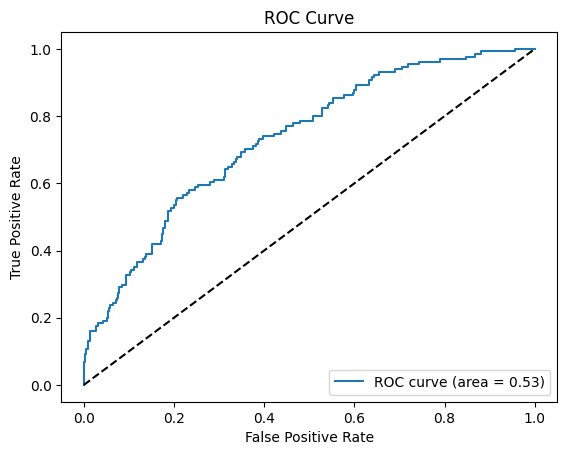

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate the AUC score
auc = roc_auc_score(y_test, lr_predict)

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lrmodel.predict_proba(X_test)[:,1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusion

Below are the observations from our analysis:
1. diabetes, prevalentStroke, currentSmoker, BPMeds are binary values with low value count for 1. Eg: 0 has 3000 records while 1 has 100 or less than 50 rows.
2. Model accuracy for training and testing dataset are around 85%
3. VIF there is no evidance of VIF > 5
4. P-values for the model 2(i.e., m2) for all values are less than 0.05. Hence we can state that model 2 is the best model.
5. According the Wald Chi-Square analysis, we can state that feature prevalentHyp, age, and cigsPerDay are the top 3 most impactful features for predicting the heart stroke.
6. Achieved the ROC at 0.53

# Decision Tree

|--- age <= 48.50
|   |--- cigsPerDay <= 16.50
|   |   |--- sysBP <= 192.00
|   |   |   |--- class: 0
|   |   |--- sysBP >  192.00
|   |   |   |--- class: 0
|   |--- cigsPerDay >  16.50
|   |   |--- diaBP <= 88.25
|   |   |   |--- class: 0
|   |   |--- diaBP >  88.25
|   |   |   |--- class: 0
|--- age >  48.50
|   |--- sysBP <= 145.25
|   |   |--- age <= 64.50
|   |   |   |--- class: 0
|   |   |--- age >  64.50
|   |   |   |--- class: 0
|   |--- sysBP >  145.25
|   |   |--- male <= 0.50
|   |   |   |--- class: 0
|   |   |--- male >  0.50
|   |   |   |--- class: 0

Index(['male', 'age', 'education', 'cigsPerDay', 'prevalentHyp', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


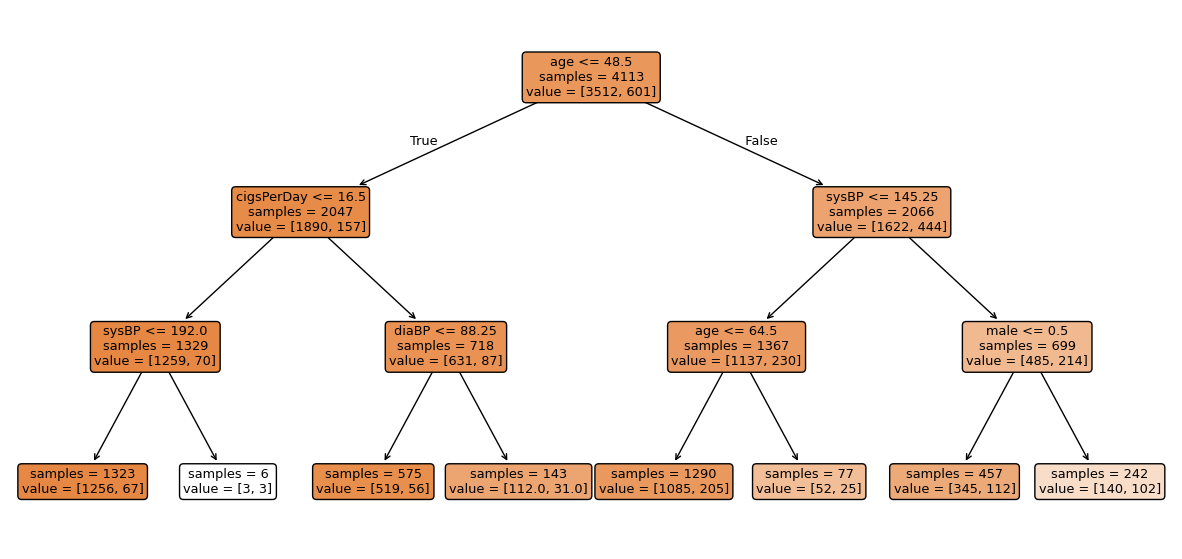

In [ ]:
#Building Tree Model
from sklearn import tree
DTree = tree.DecisionTreeClassifier(max_depth = 3)
y=df_model['TenYearCHD']

X=df_model.drop(['currentSmoker','totChol', 'TenYearCHD'],axis=1)
DTree.fit(X,y)
features=X.columns
##Plotting the trees
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))
print(features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#training Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 1.0
Test Accuracy 0.7496962332928311


In [ ]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 0.8613981762917933
Test Accuracy 0.8432563791008505
